# Fundamentals of Machine Learning: Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Continuing from where we left off, now, let's make the problem a bit more realistic, assume that the training data contains 50 points instead of 2 in a way that they don't all fall on the same line. How would one go about finding the best fit line. One could fit the line among two points and leave the rest of the points point out ( calling the left-out point as outliers ) or just account for all the data points and just find the line that minimizes the distance among the points and itself. This would be a choice for the ML expert to decide which approach is better and this would depend on the nature of the dataset and the problem being tackled. But usually, it is best to consider all the datapoints while fitting the model and therefore, try to achieve a global optimum

## Simple Linear Regression


We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form $$
y = mx + c
$$ where $a$ is commonly known as the slope, and $b$ is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

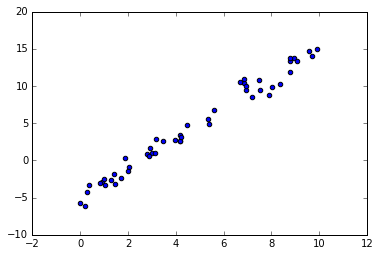

In [2]:
m = 2
c = -5
num_data_points = 50

rng = np.random.RandomState(1)
x = 10 * rng.rand(num_data_points)
y = m * x + c + rng.randn(num_data_points)
plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

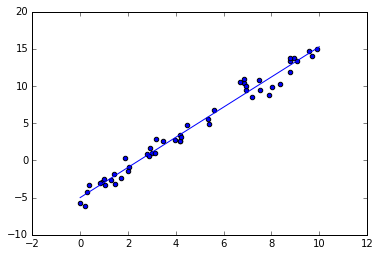

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form $$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$ where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:



In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well. One can refer to the documentation of sklearn for more information

## Further notes

So far we have assumed that we only have considered one independent variable, what if we had 2 or more independent variables. In that case our 2D plot would now become a 3D plot and we would be fitting a plane and not a line through the training data. AThis is called fitting a hyperplane ( fancy way of saying we are fitting the line equivalent in the higher dimentional planes )

And regarding the assumption that we made about the relationship between the independent and the dependent variables. We should note that this was the ML experts choice and one could use different models and fit parabolas and other geometries if they think that the shape fits the data better. And this is where the art in ML comes in and it often requires repeated experimentation to arrive at the best shape. Finally there are different classes of algorithms called SVMs that can be used for these purposes